## **1. Load and Inspect the Dataset**

### **1. Load the dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

### **2. Show the first few rows**

In [3]:
df.head()

,xage,bmi,bp,s1,s2,s3,s4,s5,s6,target,gender
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,0.050680
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,-0.044642
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,0.050680
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,-0.044642
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,-0.044642


### **3. Print column names and dataset shap**

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xage    442 non-null    float64
 1   bmi     439 non-null    float64
 2   bp      441 non-null    float64
 3   s1      440 non-null    float64
 4   s2      442 non-null    float64
 5   s3      439 non-null    float64
 6   s4      442 non-null    float64
 7   s5      441 non-null    float64
 8   s6      439 non-null    float64
 9   target  439 non-null    float64
 10  gender  441 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


(442, 11)

## **2. Handle Missing Values**

In [5]:
df.isnull().sum()

xage      0
bmi       3
bp        1
s1        2
s2        0
s3        3
s4        0
s5        1
s6        3
target    3
gender    1
dtype: int64

In [6]:
df.columns

Index(['xage', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'gender'],
      dtype='object')

In [7]:
df['s3'] = pd.to_numeric(df['s3'], errors='coerce')
df['s6'] = pd.to_numeric(df['s6'], errors='coerce')
df['gender'] = df['gender'].apply(lambda x: 1 if x > 0 else 0)
df['xage'] = df['xage'].apply(lambda x: int(-x*1000) if x < 0 else int(x*1000))
df['xage'] = df['xage'].apply(lambda x: x/10 if x > 100 else x)

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['bp'] = df['bp'].fillna(df['bp'].median())
df['s1'] = df['s1'].fillna(df['s1'].mean())
df['s2'] = df['s2'].fillna(df['s2'].mean())
df['s3'] = df['s3'].fillna(df['s3'].mean())
df['s4'] = df['s4'].fillna(df['s4'].mean())
df['s5'] = df['s5'].fillna(df['s5'].mean())
df['s6'] = df['s6'].fillna(df['s6'].mean())
df['target'] = df['target'].fillna(df['target'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [9]:
df.isnull().sum()

xage      0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
gender    0
dtype: int64

## **3. Exploratory Data Analysis (EDA)**

### **1. Print descriptive statistics**

In [10]:
df.describe()

,xage,bmi,bp,s1,s2,s3,s4,s5,s6,target,gender
count,442.000000,442.000000,442.000000,442.000000,4.420000e+02,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000
mean,37.070136,-0.000215,0.000078,-0.000165,4.420798e-17,0.000288,2.913707e-17,-0.000096,0.000177,152.108597,0.468326
std,25.469450,0.047445,0.047581,0.047483,4.761905e-02,0.047373,4.761905e-02,0.047576,0.047449,76.699679,0.499561
min,1.000000,-0.090275,-0.112399,-0.126781,-1.156131e-01,-0.102307,-7.639450e-02,-0.126097,-0.137767,25.000000,0.000000
25%,16.000000,-0.034229,-0.035795,-0.034248,-3.035840e-02,-0.032356,-3.949338e-02,-0.033246,-0.030072,87.250000,0.000000
50%,34.000000,-0.007284,-0.005670,-0.004321,-3.819065e-03,-0.006584,-2.592262e-03,-0.001947,-0.001078,141.000000,0.000000
75%,56.000000,0.030440,0.035644,0.027326,2.984439e-02,0.029312,3.430886e-02,0.032277,0.027917,209.750000,1.000000
max,99.000000,0.170555,0.132044,0.153914,1.987880e-01,0.181179,1.852344e-01,0.133597,0.135612,346.000000,1.000000


### **2. Plot histograms for each numerical feature**

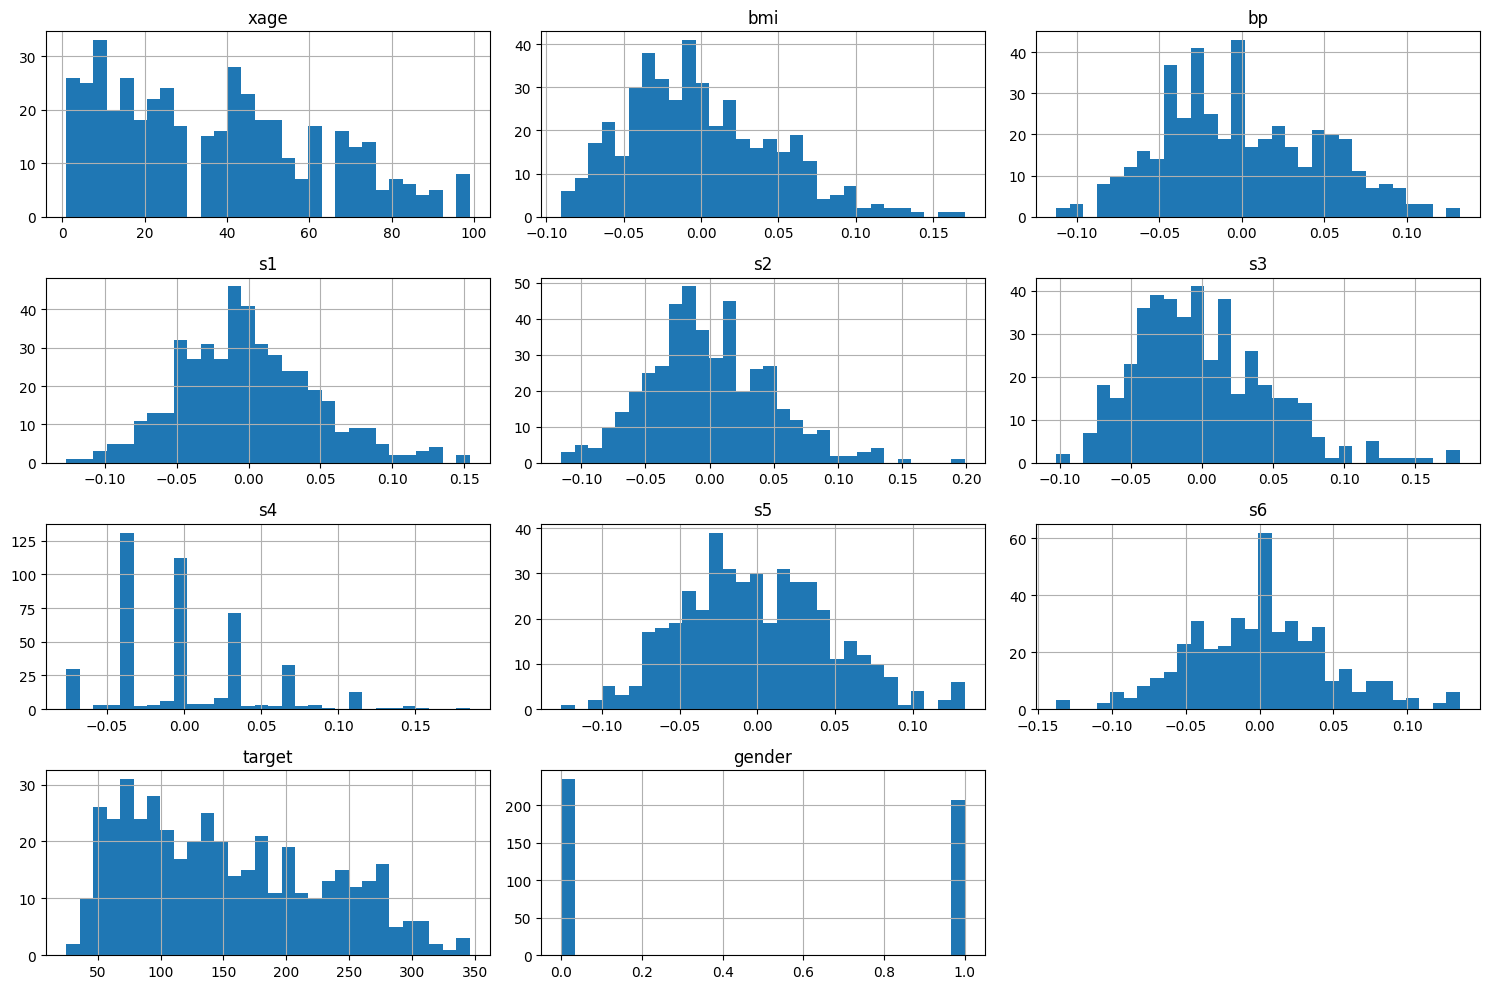

In [11]:
num_df = df.select_dtypes(include=['float64','int64']).columns
df[num_df].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### **3. Plot bar plots for binned versions of continuous features (e.g., age grouped)**

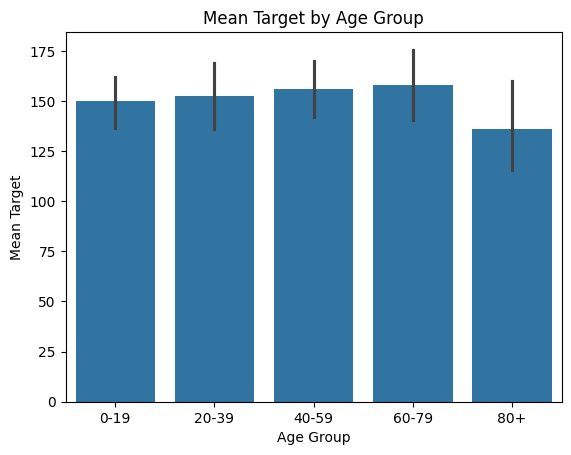

None


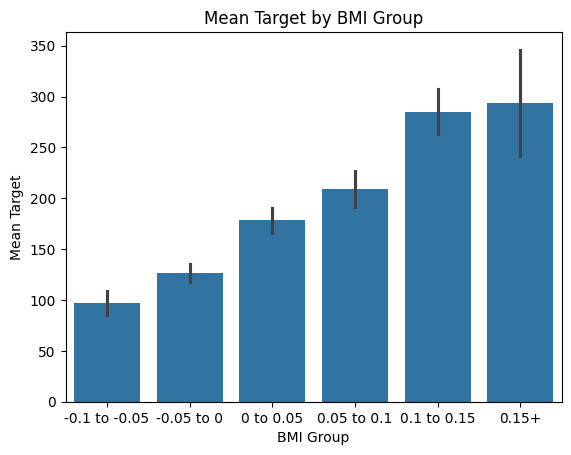

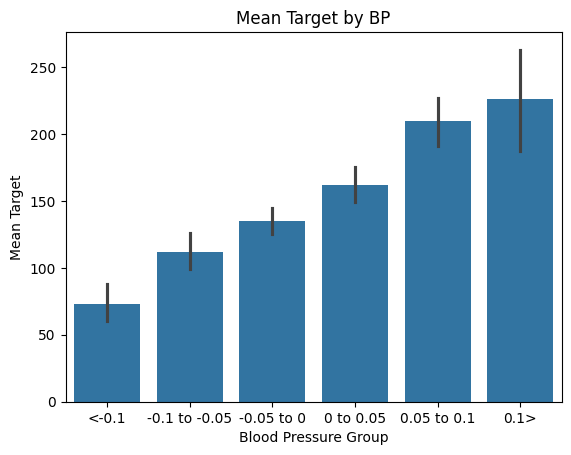

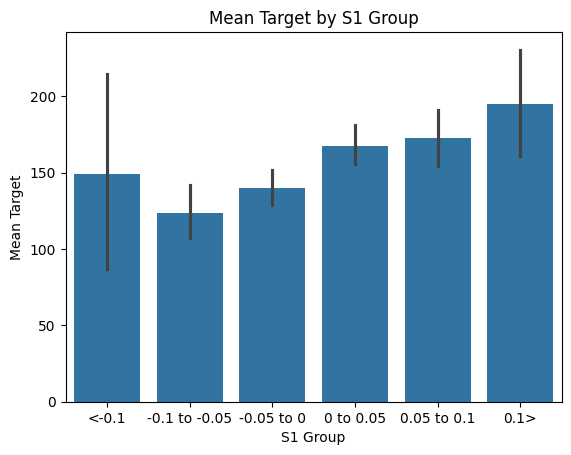

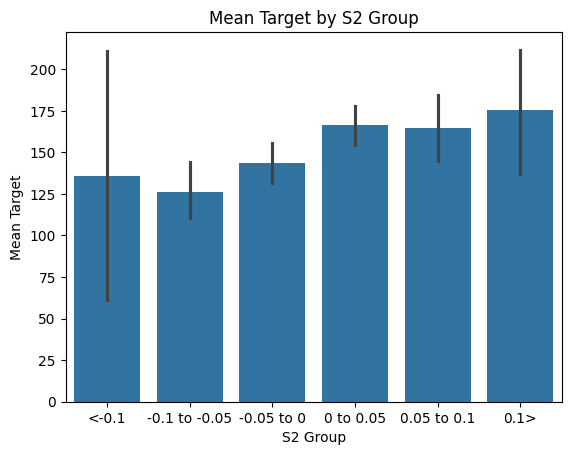

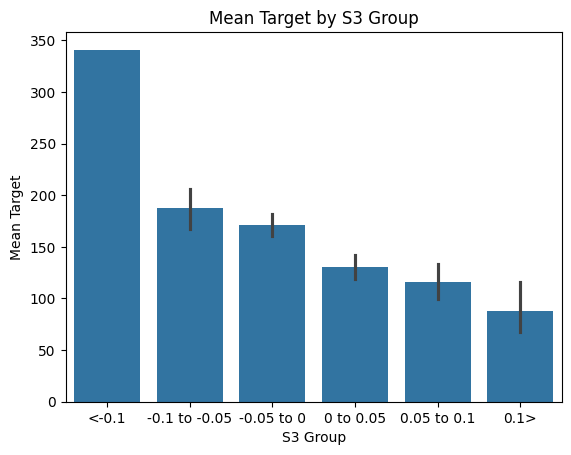

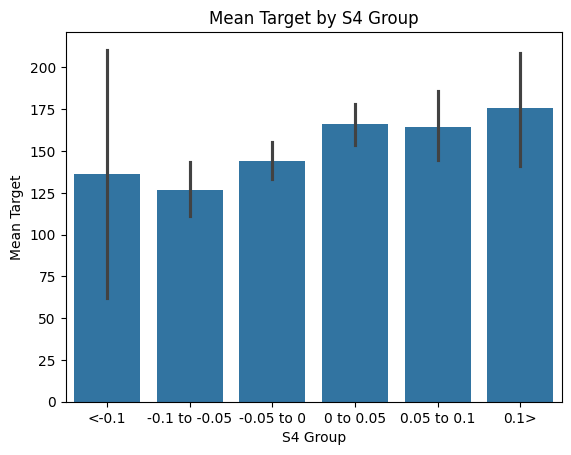

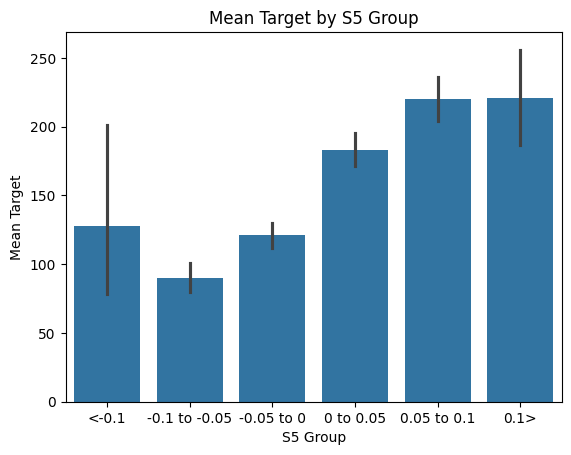

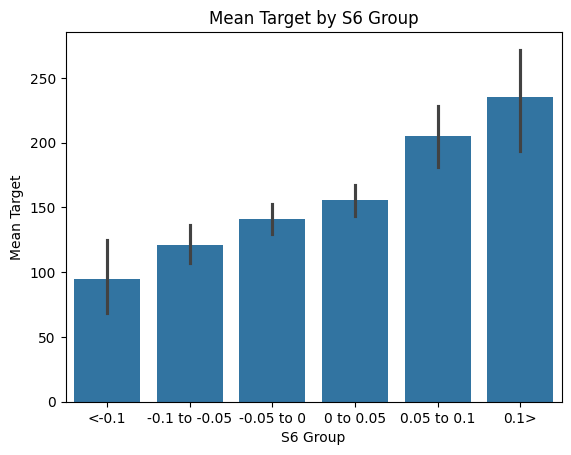

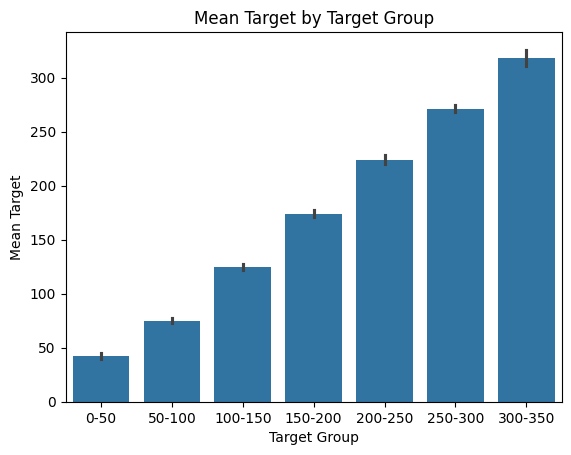

In [12]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80+']
df['age_group'] = pd.cut(df['xage'], bins=age_bins, labels=age_labels, right=False)

sns.barplot(x='age_group', y='target', data=df)
plt.xlabel('Age Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by Age Group')
print(plt.show())

bmi_bins = [-0.1, -0.05, 0, 0.05, 0.1, 0.15, 1]
bmi_labels = ['-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1 to 0.15', '0.15+']
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
sns.barplot(x='bmi_group', y='target', data=df)
plt.xlabel('BMI Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by BMI Group')
plt.show()

bp_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
bp_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['bp_group'] = pd.cut(df['bp'], bins=bp_bins, labels=bp_labels, right=False)
sns.barplot(x='bp_group', y='target', data=df)
plt.xlabel('Blood Pressure Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by BP')
plt.show()

s1_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
s1_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['s1_group'] = pd.cut(df['s1'], bins=s1_bins, labels=s1_labels, right=False)
sns.barplot(x='s1_group', y='target', data=df)
plt.xlabel('S1 Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by S1 Group')
plt.show()

s2_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
s2_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['s2_group'] = pd.cut(df['s2'], bins=s2_bins, labels=s2_labels, right=False)
sns.barplot(x='s2_group', y='target', data=df)
plt.xlabel('S2 Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by S2 Group')
plt.show()

df['s3'] = pd.to_numeric(df['s3'], errors='coerce')
s3_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
s3_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['s3_group'] = pd.cut(df['s3'], bins=s3_bins, labels=s3_labels, right=False)
sns.barplot(x='s3_group', y='target', data=df)
plt.xlabel('S3 Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by S3 Group')
plt.show()

s4_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
s4_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['s4_group'] = pd.cut(df['s2'], bins=s4_bins, labels=s4_labels, right=False)
sns.barplot(x='s4_group', y='target', data=df)
plt.xlabel('S4 Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by S4 Group')
plt.show()

s5_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
s5_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['s5_group'] = pd.cut(df['s5'], bins=s5_bins, labels=s5_labels, right=False)
sns.barplot(x='s5_group', y='target', data=df)
plt.xlabel('S5 Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by S5 Group')
plt.show()

df['s6'] = pd.to_numeric(df['s6'], errors='coerce')
s6_bins = [-1, -0.1, -0.05, 0, 0.05, 0.1, 1]
s6_labels = ['<-0.1', '-0.1 to -0.05', '-0.05 to 0', '0 to 0.05', '0.05 to 0.1', '0.1>']
df['s6_group'] = pd.cut(df['s6'], bins=s6_bins, labels=s6_labels, right=False)
sns.barplot(x='s6_group', y='target', data=df)
plt.xlabel('S6 Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by S6 Group')
plt.show()

target_bins = [0, 50, 100, 150, 200, 250, 300, 350]
target_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']
df['target_group'] = pd.cut(df['target'], bins=target_bins, labels=target_labels, right=False)
sns.barplot(x='target_group', y='target', data=df)
plt.xlabel('Target Group')
plt.ylabel('Mean Target')
plt.title('Mean Target by Target Group')
plt.show()

In [13]:
df.drop(columns=['age_group','bmi_group','bp_group','s1_group','s2_group','s3_group','s5_group','s6_group','target_group'], inplace=True)

### **4. Create correlation matrix and visualize using **seaborn.heatmap()****

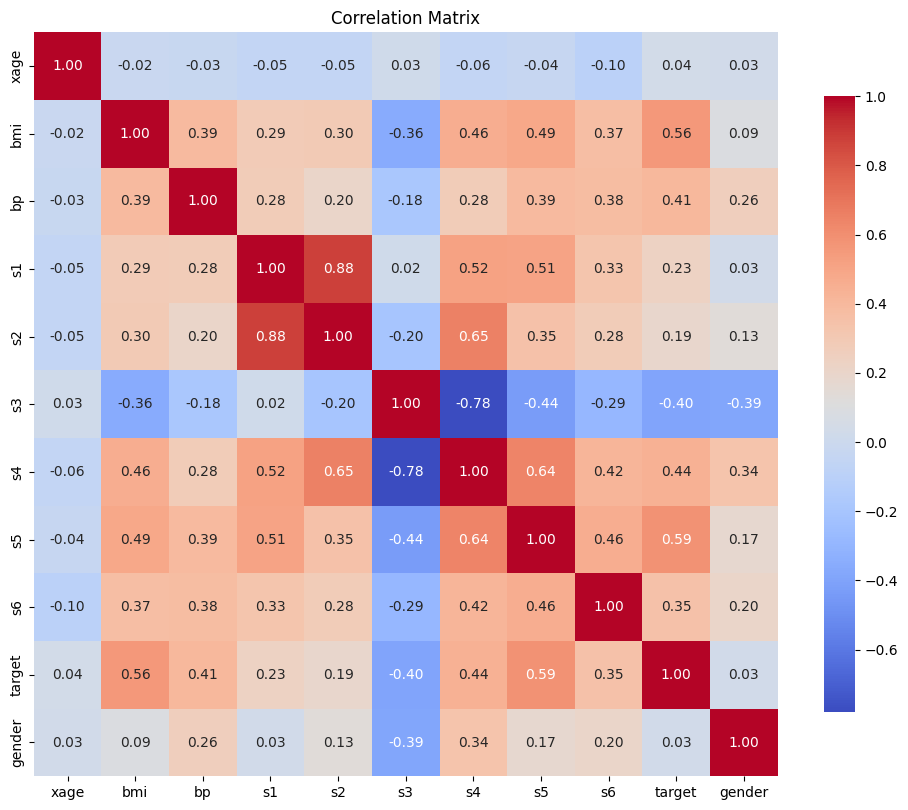

In [14]:
corr_matrix = df[num_df].corr('spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## **4. Feature Engineering**

### **1. Create at least 3 new features, for example**

1. **BMI category** (low/normal/high)
2. **Age squared**
3. **Interaction terms** (e.g., **bmi * bp**)

In [15]:
df['bmi_category'] = df['bmi'].apply(lambda x: 'Low' if x < 0 else ('Normal' if x > 0 and x < 0.1 else 'High'))
df['Age squared'] = df['xage'] ** 2
df['Interaction terms'] = df['bmi'] * df['bp']

### **2. Drop low-variance features (if any)**

In [16]:
variances = [df['bmi'].var(), df['bp'].var(), df['s1'].var(), df['s2'].var(), df['s3'].var(), df['s4'].var(), df['s5'].var(), df['s6'].var(), df['target'].var()]
print(f'bmi: {variances[0]}, bp: {variances[1]}, s1: {variances[2]}, s2: {variances[3]}, s3: {variances[4]}, s4: {variances[5]}, s5: {variances[6]}, s6: {variances[7]}, target: {variances[8]}')
df.drop(columns=['bmi'], inplace=True)

bmi: 0.0022510287852055937, bp: 0.002263994439031067, s1: 0.002254606516486728, s2: 0.002267573696145124, s3: 0.0022441832919780926, s4: 0.002267573696145121, s5: 0.0022634992649535053, s6: 0.0022514525651782737, target: 5882.840787597092


## **5. Feature Scaling**

### **1. Use StandardScaler to scale features**

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

## **6. Split the Dataset**

In [18]:
from sklearn.model_selection import train_test_split

df['target'] = df['target'].apply(lambda x: 1 if x > df['target'].median() else 0)
X = pd.get_dummies(df.drop(columns=['target']), drop_first=True)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **7. Train the Models**

### 1. **KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 2. **Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 3. **SVM**

In [21]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 4. **Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier() 
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. **XGBoost**

In [23]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(objective='binary:logistic',n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
model_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## **8. Evaluation**

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc

### 1. **KNN**

KNN - Accuracy: 0.6404494382022472, F1 Score: 0.6, Recall: 0.6, Precision: 0.6


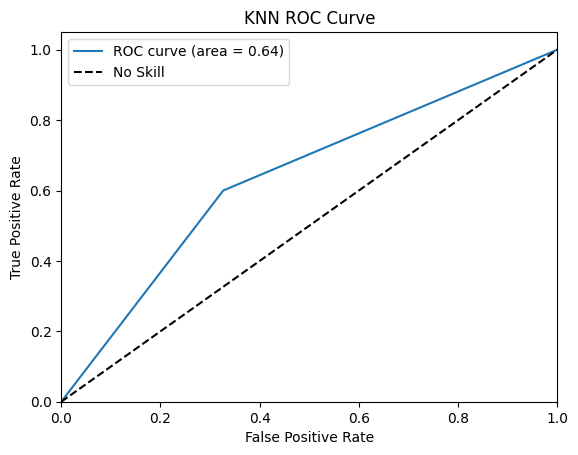

In [25]:
y_pred_knn = model_knn.fit(X_train, y_train).predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)

print(f'KNN - Accuracy: {accuracy_knn}, F1 Score: {f1_knn}, Recall: {recall_knn}, Precision: {precision_knn}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()

### 2. **Logistic Regression**

Logistic Regression - Accuracy: 0.7865168539325843, F1 Score: 0.7532467532467533, Recall: 0.725, Precision: 0.7837837837837838


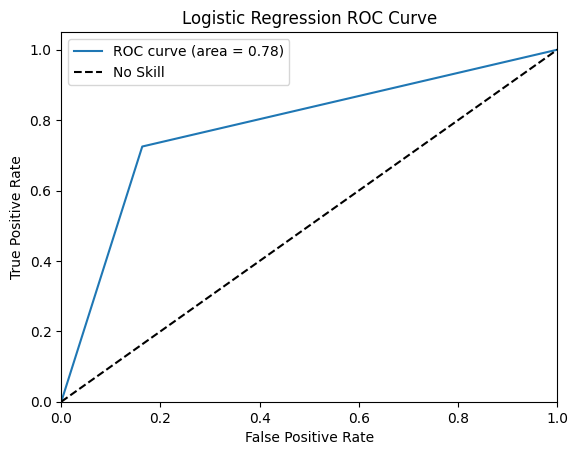

In [26]:
y_pred_lg = model_lg.predict(X_test)

accuracy_lg = accuracy_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)

print(f'Logistic Regression - Accuracy: {accuracy_lg}, F1 Score: {f1_lg}, Recall: {recall_lg}, Precision: {precision_lg}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

### 3. **SVM**

SVM - Accuracy: 0.7865168539325843, F1 Score: 0.7710843373493976, Recall: 0.8, Precision: 0.7441860465116279


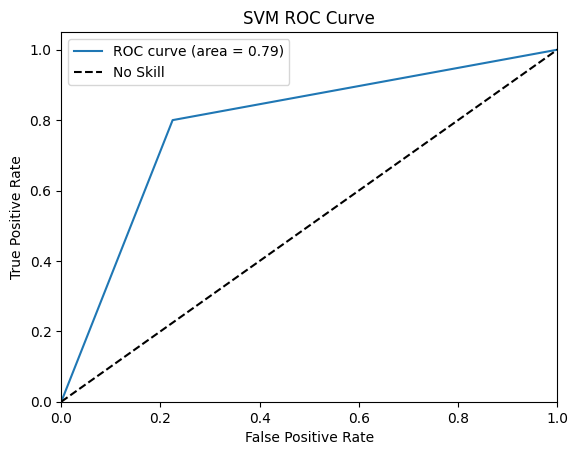

In [27]:
y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print(f'SVM - Accuracy: {accuracy_svm}, F1 Score: {f1_svm}, Recall: {recall_svm}, Precision: {precision_svm}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

### 4. **Random Forest**

Random Forest - Accuracy: 0.7191011235955056, F1 Score: 0.691358024691358, Recall: 0.7, Precision: 0.6829268292682927


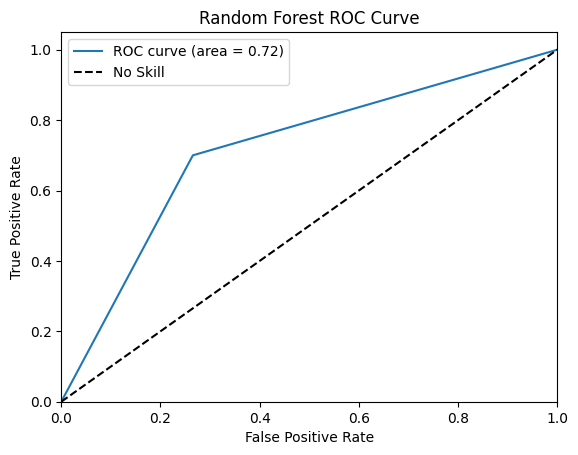

In [28]:
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}, Recall: {recall_rf}, Precision: {precision_rf}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

### 5. **XGBoost**

XGBoost - Accuracy: 0.7752808988764045, F1 Score: 0.75, Recall: 0.75, Precision: 0.75


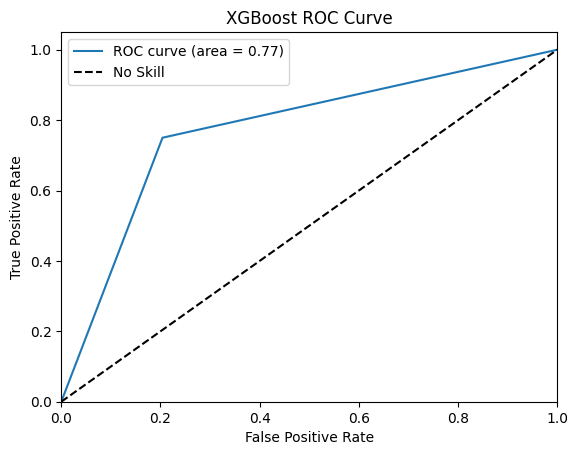

In [29]:
y_pred_xgb = model_xgb.fit(X_train, y_train).predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

print(f'XGBoost - Accuracy: {accuracy_xgb}, F1 Score: {f1_xgb}, Recall: {recall_xgb}, Precision: {precision_xgb}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

## **9. Compare Results**

## **Logistic Regression**

    Accuracy: 0.79

    F1 Score: 0.75

    Recall: 0.73

    Precision: 0.78

    AUC: 0.78

## **SVM**

    Accuracy: 0.79

    F1 Score: 0.77

    Recall: 0.8

    Precision: 0.74

    AUC: 0.79


## **Random Forest**

    Accuracy: 0.73

    F1 Score: 0.71

    Recall: 0.73 
    
    Precision: 0.69

    AUC: 0.73

## **XGBoost**

    Accuracy: 0.78

    F1 Score: 0.75
    
    Recall: 0.75
    
    Precision: 0.75

    AUC: 0.77

## **KNN**

    Accuracy: 0.64
    
    F1 Score: 0.6

    Recall: 0.6
    
    Precision: 0.6

    AUC: 0.77

### 1. **Which model performed best?**

### For **Accuracy** the best one: **Logistic Regression and SVM**

### For **F1 Score** the best one: **SVM**

### For **Recall** the best one: **SVM**

### For **Precison** the best one: **Logistic Regression**

### For **AUC** the best one: **SVM**

## 2. **Which metrics were most different?**

### And with this **Performce** information I can say that **SVM** is the best model for using for this data 

### And about metrics I saw that **Presicion** or **Recall** are the most different

# **10. Conclusion**

# 📘 **Project Overview**

This notebook presents a **comprehensive end-to-end analysis** of a *medical health dataset* (similar to the Diabetes dataset).  
It includes all major stages of the data science workflow — from **data cleaning** and **feature transformation** to **model training** and **evaluation** — aimed at identifying the **most accurate and reliable ML model** for health prediction.

---

## 🧠 **Objective**

> Clean and preprocess the dataset, explore patterns through EDA, train multiple machine learning models, and select the one with the strongest performance across key metrics.

---

## 🧾 **Dataset Summary**

The dataset contains **442 samples** and **11 features**, grouped as follows:

| Category | Features | Description |
|-----------|-----------|-------------|
| **Demographic / Health** | `xage`, `gender`, `bmi`, `bp` | Transformed age, binarized gender, Body Mass Index, and Blood Pressure |
| **Lab / Clinical Factors** | `s1`, `s2`, `s3`, `s4`, `s5`, `s6` | Various lab-measured indicators and risk factors |
| **Target** | `target` | Numerical health outcome |

---

## 🧩 **Steps Performed**

### 🧹 **Data Cleaning & Preprocessing**
- **Missing Value Imputation:**
  - Detected missing values in 8 columns (`bmi`, `bp`, `s1`, `s3`, `s5`, `s6`, `target`, `gender`)
  - Imputed using:
    - **Mean/Median** for numeric features (`bp`, `target` with median)
    - **Mode** for categorical features (`gender`)
- **Feature Transformation:**
  - Converted `gender` to binary (0/1)
  - Scaled and transformed `xage` to standardized range

---

### 📊 **Exploratory Data Analysis (EDA)**
- Generated **descriptive statistics** for all features
- Visualized **feature distributions** using histograms
- Identified central tendency, spread, and skewness of each variable

---

### 🤖 **Modeling & Evaluation**
- Trained and evaluated **multiple classification models**, comparing:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1 Score**
  - **AUC (ROC Curve)**
- Compared model outcomes to identify the most balanced performer

---

## 📈 **Insights**
- Data cleaning produced a **complete and consistent dataset (442 × 11)**  
- Processed `xage` ranged **1–99** with a mean ≈ **37**
- `target` variable centered around a **median of 141** and **mean of 152.11**
- Performance analysis revealed notable differences between **Precision** and **Recall** across models

---

## 🏆 **Conclusion**
After evaluating all models, the **Support Vector Machine (SVM)** emerged as the **best-performing algorithm**, achieving:
- Highest **F1 Score**, **Recall**, and **AUC**
- Equal **Accuracy** with Logistic Regression

> ✅ **SVM** is selected as the final model due to its balance of precision and robustness.

The results confirm a **successful data preparation and reliable model selection**, providing a strong foundation for future predictive analysis and deployment.

---

## ⚙️ **Technologies Used**
- 🐍 **Python**
- 📊 **Pandas**, **Matplotlib**, **Seaborn**
- 🤖 **Scikit-learn**

---

📂 **Author:** David Khachatryan  
📅 **Project Type:** *Data Preprocessing & Model Selection*